## Review/Questions [10 minute]
1. See Nov15 TUT and Nov18 LEC
    1. The *confusion matrix* is the most relevant topic to review for the upcomming week material
    
> If anything is unclear about the concepts we've covered so far, now is a good opportunity to raise your questions before we dive into the ethics module!

## Demo and Discussion [50 minutes]: *Biases and Unfairness* in Clinical Trials and the 'Adult Income' Dataset?

### 1. Clinical Trial: Confusion Matrix and Ethical Considerations [25/50 minutes]


> Lyme disease is a tick-borne illness that can cause severe health problems if not treated early. Early symptoms are often nonspecific and can mimic less severe viral illnesses, making accurate diagnosis necessarg. A healthtech company has developed a predictive machine learning model intended to assist doctors in diagnosing Lyme disease based on symptoms, history of tick exposure, and initial blood tests. The model was tested in a clinical trial involving patients suspected of having Lyme disease based on their symptoms and exposure history. 

#### A. *Confusion matrix* and *metrics* 

|                 | Predict Disease | Predict No Disease |
|-----------------|-----------------|--------------------|
| **Disease**     | 23 (TP)         | 7 (FN)             |
| **No Disease**  | 90 (FP)         | 280 (TN)           |

- **True Positives (TP)**: 23 - The model correctly predicted the disease.
- **False Negatives (FN)**: 7 - The model incorrectly predicted no disease when the disease was present.
- **False Positives (FP)**: 90 - The model incorrectly predicted the disease when it was absent.
- **True Negatives (TN)**: 280 - The model correctly predicted no disease.

**Accuracy**: $\frac{TP + TN}{TP + FN + FP + TN} = \frac{23 + 280}{23 + 7 + 90 + 280} = 0.759$

**Specificity**: $\frac{TN}{FP + TN} = \frac{280}{90 + 280} = 0.757$

**Sensitivity** : $\frac{TP}{TP + FN} = \frac{23}{23 + 7} = 0.767$


> The following section now explores the consideration that the above *metrics* are measured with respect to the "truth" (which we don't know), as opposed to the prediction that we make... perhaps considering a "different denonenator" that looks at things from a different perspective is relevant here?

#### B. *Class Imbalance and Ethical Considerations* for relevant decision-making perspectives

1. *Healthcare Provider Decision - Treatment Commencement*
    1. **Context**: A provider reviews the model output before deciding to treat a patient suspected of Lyme disease.
    2. **Question**: Should the healthcare provider initiate treatment based solely on the model’s diagnosis considering the high rate of false positives, or should additional tests be done first? What are the ethical implications of either decision, especially given the risk of progression in untreated Lyme disease?


2. *Patient Perspective - Trust in Medical Advice*
    1. **Context**: A patient diagnosed with Lyme disease learns about the model's high false positive rate.
    2. **Question**: How should the patient approach the decision to accept the treatment recommended based on the model’s prediction? What steps could they take to manage their anxiety and mistrust towards the diagnosis?


3. *Healthcare System Decision - Model Calibration*
    1. **Context**: Administrators assess the model's impact on healthcare practices.
    2. **Question**: Should the healthcare system recalibrate the model to adjust the **sensitivity** and **specificity** based on the current performance metrics? Consider the implications of such a recalibration on patient care, resource allocation, and ethical responsibilities of healthcare providers.

### 2. Ethical problems with poor practices when using proposed models [25/50 minutes]

> This example will center on the `Adult Data` [dataset](https://archive.ics.uci.edu/dataset/2/adult) (https://archive.ics.uci.edu/dataset/2/adult).

1. **Unfairness and Bias: Impacts of Representational and Historical Bias**
   
   Disproportionately imbalanced data and historical inequities within a dataset influence model predictions, potentially perpetuating past biases and affecting fairness in outcomes.
   > We will soon see that there is a lot of imbalance across the different `Adult Data` variables.
   > 1. Is this still proportionally representative of the current population?
   > 2. The `Adult Data` is from the 1994 census, which was 30 years ago. Could making predictions which extrapolate past social data and trends into the present be problematic?  

2. **Integrity and Credibility ("Garbage in, garbate out"): Model Explainability and Transparency** 

    It is necessary that model-based predictive outcome driven decision-making processes can be transparently understood to ensure they can be fairly and rationally evaluted by the relevant stakeholders and the trustworthiness of model can be established
   > We will demonstrate a number of incorrect use of the `Adult Data` in a predictive model.
   > 1. Are categorical and continuous variables treated correctly?
   > 2. Are the relationships between between the predictor variables themselves potentially problematic? 
     
3. **Accountability of Modeling: Positive Effect or Instruments of Harm?** 

   We must be able to evaluate whether the application of a model serves as beneficial tools for decision-making, and challenge their use if they inadvertently become instruments of harm due to inherent underlying biases or flawed assumptions.

   > The analyses below are using the `Adult Data` to predict income. 
   > 1. What are the postiive applications of this model? What are the negative applications of this model? 
   > 2. If predictor variables are related, does removing a predictor variable mean it's "effects" are removed from a predictive model? 


#### A. Analysis Tools

In [148]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# in sklearn specificity is recall_score(y_true, y_pred, pos_label=0)
# while sensitivity recall_score(y_true, y_pred, pos_label=1) is the default 
# precision_score = TP/(TP+TP) measuring the rate of corerct positive predictions 
# ...a useful characterization for the previous Clinical Trial considerations...
# f1_score is a "harmonic mean" of precision_score and (default) recall_score
# f1_score = 2*TP/(2*TP+FP+FN)

# These will be used to examine the relationship between the predictors themselves
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#### B. Data Pre-Processing I

In [90]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", 
    "marital-status", "occupation", "relationship", "race", 
    "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

data_raw = pd.read_csv(url, names=column_names, skipinitialspace=True)

data_use = data_raw.copy()
data_use = data_use.drop(columns=['workclass', 'marital-status', 'occupation', 
                                'capital-gain', 'capital-loss', 'hours-per-week', 
                                'native-country', 'education-num', 'fnlwgt'])

display(data_use.head(), data_use.shape)

,age,education,relationship,race,sex,income
0,39,Bachelors,Not-in-family,White,Male,<=50K
1,50,Bachelors,Husband,White,Male,<=50K
2,38,HS-grad,Not-in-family,White,Male,<=50K
3,53,11th,Husband,Black,Male,<=50K
4,28,Bachelors,Wife,Black,Female,<=50K


(32561, 6)

#### C. Initial Exploratory Data Analysis (EDA)

> Let's examine the considerations of "1. **Unfairness and Bias: Impacts of Representational and Historical Bias**" above. 
Interact with ChatGPT around the following prompts.
> 
> > **Prompt 1**: "I am going to share some data distributions from a dataset with you and would like you summarize the potential imbalances and biases present in the data."
> > - Then share, one at a time, the empirical data distributions observed below with ChatGPT and see if the responses appear correct.
> >
> > **Prompt 2**: "This data is from the 1994 Census, and I'm planning to use it to create a model to predict income levels. What considerations should I take into account regarding the previous imbalances you discussed in the data when using this data to create this model?  
> >
> > **Prompt 3**: What considerations should I have when using this historical data to predict present day outcomes? What concerns might there be with these kinds of extrapolations?
>
> Do you think the points raised in the response from ChatGPT were correctly identified and prioritized?


In [91]:
# Inbalance data...
education_counts = data_use['education'].value_counts()
sex_counts = data_use['sex'].value_counts()
race_counts = data_use['race'].value_counts()
relationship_counts = data_use['relationship'].value_counts()
income_counts = data_use['income'].value_counts()

display(education_counts, sex_counts, race_counts, relationship_counts, income_counts)

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

sex
Male      21790
Female    10771
Name: count, dtype: int64

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

#### D. Data Pre-Processing II

> Let's examine the considerations of "2. **Integrity and Credibility ("Garbage in, garbate out"): Model Explainability and Transparency**" above. 
> 
> Review this "[pre-processing](https://chat.openai.com/share/d3b53784-6442-46da-b42d-5567a503991c)" interaction with ChatGPT and connect the noted potential concerns regarding the data preprocessing to the code below.  
> 
> After that, then review the primary ethical concerns that were identified in the response and evaluate whether or not these represent new" considerations beyone what's already been discussed. 

In [105]:
# Reset data (for convenience)
data_v0 = data_use.copy()

# Check if any NaN values are present and warn if so
if data_v0.isna().any().any():
    print("Warning: NA values found in 'income' after mapping.") 

# Standardize the age column
scaler = StandardScaler()
data_v0.loc[:,'age'] = scaler.fit_transform(data_use[['age']].astype(float))
    
# Encode categorical variables
categorical_columns = ['income', 'education', 'relationship', 'race', 'sex']

# V1
data_v1 = data_v0.join(pd.get_dummies(data_v0[categorical_columns], 
                                      drop_first=True).astype(int))
data_v1 = data_v1.drop(columns=categorical_columns)

# V2? Why is this wrong? 
data_v2 = data_v0.join(pd.get_dummies(data_v0[categorical_columns], 
                                      drop_first=False).astype(int))
data_v2 = data_v2.drop(columns=categorical_columns)
data_v2 = data_v2.drop(columns='income_<=50K') # opposite outcome
# Why are we dropping the opposite outcome this way here?

# V3? Why is this wrong? 
data_v3 = data_v0.copy()
for column in categorical_columns:
    data_v3[column] = pd.Categorical(data_v0[column]).codes
data_v3 = data_v3.rename(columns = {'income': 'income_>50K'}) # outcome

In [106]:
# Consider v1, v2, and v3
print(data_v3.dtypes)
data_v3

age             float64
education          int8
relationship       int8
race               int8
sex                int8
income_>50K        int8
dtype: object


,age,education,relationship,race,sex,income_>50K
0,0.030671,9,1,4,1,0
1,0.837109,9,0,4,1,0
2,-0.042642,11,1,4,1,0
3,1.057047,1,0,2,1,0
4,-0.775768,9,5,2,0,0
...,...,...,...,...,...,...
32556,-0.849080,7,5,4,0,0
32557,0.103983,11,0,4,1,1
32558,1.423610,11,4,4,0,0
32559,-1.215643,11,3,4,1,0


> The code below uses a methodology called **Variance Inflaction Factors (VIFs)** that measures **multicollinearity** which is the degree to which predictor variables are indistinguishable from the perspective of the linear model.
>
> - So, when `race_Black` has a large VIF then it is "confounded" with other variables in the model.
> - This means the coefficient estimates in a statsitical analysis are less reliable, which is reflected in an increased (less statistically signifificant p-value).
> - The prescribed response to an insignificant predictor variable is to remove it from the model, but if the variable was "confounded" with other variables in the model then it is still indirectly a part of the model.
> - In the `race_Black` example, this means that a model will still make predictions that are are associated with `race_Black` even though this variable is not even used in the model!

In [153]:
# Check for problematic multicollinearity using Variance Inflaction Factors (VIFs)

# Consider v1, v2, and v3
y = data_v1['income_>50K']
X = data_v1.drop(columns='income_>50K')
X['intercept'] = 1

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i).astype(int) 
                   for i in range(X.shape[1])]
print("Variance Inflaction Factor (VIF) values:\n", vif_data)

Variance Inflaction Factor (VIF) values:
                         feature  VIF
0                           age    1
1                education_11th    2
2                education_12th    1
3             education_1st-4th    1
4             education_5th-6th    1
5             education_7th-8th    1
6                 education_9th    1
7          education_Assoc-acdm    2
8           education_Assoc-voc    2
9           education_Bachelors    5
10          education_Doctorate    1
11            education_HS-grad    8
12            education_Masters    2
13          education_Preschool    1
14        education_Prof-school    1
15       education_Some-college    6
16   relationship_Not-in-family    1
17  relationship_Other-relative    1
18       relationship_Own-child    1
19       relationship_Unmarried    1
20            relationship_Wife    1
21      race_Asian-Pac-Islander    4
22                   race_Black   10
23                   race_Other    1
24                   race_White  

#### E. Model Fitting: Statistical Analysis

> Let's examine the considerations of "3. **Accountability of Modeling: Positive Effect or Instruments of Harm?**" above; specifically, the following:
>
> > A. What are the positive applications of this model? What are the negative applications of this model? 
> >
> > B. If predictor variables are related, does removing a predictor variable mean it's "effects" are removed from a predictive model? 
>
> The analysis below shows that due to **multicollinearity** (as seen through the **VIF** values) `race_Black` coefficient are not very reliable; but, for the same reason, the indirect influence of the `race_Black` variable in the model cannot be removed by simply removing the variable from the model. 
>
> Thus, in making predictions (regardless of the inclusion or exclusion of the `race_Black` variable in the model), the predictions of this model will have observable associations with the `race_Black` variable.  Could this be misused in a harmful manner? 

In [154]:
# Statistical analysis
#log_reg = sm.Logit(y_train, X_train).fit()
log_reg = sm.Logit(y, X).fit()
display(log_reg.summary().tables[0])
log_reg_fit_sum = pd.read_html(log_reg.summary().tables[1].as_html(), header=0, index_col=0)[0]
log_reg_fit_sum.loc[:,'VIF'] = vif_data.set_index('feature')
log_reg_fit_sum

         Current function value: 0.374360
         Iterations: 35


/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Dep. Variable:,income_>50K,No. Observations:,32561
Model:,Logit,Df Residuals:,32534
Method:,MLE,Df Model:,26
Date:,"Sun, 19 May 2024",Pseudo R-squ.:,0.3218
Time:,11:35:01,Log-Likelihood:,-12190.
converged:,False,LL-Null:,-17974.
Covariance Type:,nonrobust,LLR p-value:,0.000


,coef,std err,z,P>|z|,[0.025,0.975],VIF
age,0.3239,0.018,17.662,0.000,0.288,0.360,1
education_11th,0.0182,0.197,0.092,0.926,-0.368,0.404,2
education_12th,0.5575,0.240,2.321,0.020,0.087,1.028,1
education_1st-4th,-0.9428,0.446,-2.116,0.034,-1.816,-0.069,1
education_5th-6th,-0.6535,0.297,-2.204,0.028,-1.235,-0.072,1
education_7th-8th,-0.5993,0.217,-2.757,0.006,-1.025,-0.173,1
education_9th,-0.4379,0.246,-1.777,0.076,-0.921,0.045,1
education_Assoc-acdm,1.7605,0.161,10.929,0.000,1.445,2.076,2
education_Assoc-voc,1.6635,0.155,10.719,0.000,1.359,1.968,2
education_Bachelors,2.5088,0.143,17.543,0.000,2.229,2.789,5


## Communication [40 minutes]
Organize students into four groups to engage in a TA-moderated debate centered around two distinct ethical scenarios. Each scenario will be tackled by two groups, with one group defending a position and the other opposing it. Allow groups 12 minutes to discuss, prepare, and assign their argument roles, and then have the two groups debate their positions for 12 minutes in the following format

> 3 different group members from the "defending group" will each present one argument for each of the "Ethical Concerns" below (with a 3 minute limit per group); then, the "opposing group" similarly argues three points. The remaining members from each group who have not yet argued may then provide rebuttles (with a 3 minute limit per group), starting with the "defending team" and then concluding with the "opposing team". There will then be 2 minutes for the class to reflect on the arguments and vote on the following two points: 
> 1. the effectiveness of the debating teams in presenting their points 
> 2. the position of the debating teams which students personally agree with

### Scenario 1: Predictive Policing
**Background**: A city's police department has implemented a new AI system designed to predict crime hotspots by analyzing historical crime data and demographic information. The system is intended to optimize police patrols and prevent crimes before they occur.

**Debate positions**:
- **Group A: defending the use of the AI system for policing**. Argue that predictive policing is a valuable tool for enhancing public safety and efficiently allocating police resources.
- **Group B: opposing the use of the AI system for policing**. Contend that predictive policing perpetuates socio-racial-economic bias, violates privacy, and lacks the necessary transparency and oversight.

**Ethical Concerns**:
- **Bias and Discrimination**: The AI system may inadvertently target minority communities if the historical crime data is biased.
- **Privacy**: The use of demographic data raises concerns about the surveillance and profiling of specific groups.
- **Transparency**: There may be limited transparency regarding how the AI system makes decisions and whether it accurately predicts crime without infringing on citizens' rights.


### Scenario 2: Healthcare AI for Predicting Patient Risks
**Background**: A healthcare startup has developed an AI system that uses patient data such as medical history, lifestyle choices, and genetic information to predict individuals’ risks of developing chronic diseases.

**Debate Positions**:
- **Group A: defending the use of the AI system for healthcare**. Defend the use of AI in healthcare as a means to advance preventive medicine and personalized care, potentially saving lives by early identification of risk factors.
- **Group B: opposing the use of the AI system for healthcare**. Argue that the use of AI in healthcare could compromise patient privacy, create disparities in healthcare access, and rely on potentially flawed algorithms that could misguide medical decisions.

**Ethical Concerns**:
- **Consent and Data Usage**: Concerns about how patient data is collected, used, and shared, particularly sensitive genetic information.
- **Accuracy and Reliability**: Potential inaccuracies in AI predictions could lead to misdiagnosis or unnecessary anxiety for patients.
- **Access and Equality**: The AI system could lead to unequal access to healthcare if predictions are used to prioritize care or determine insurance premiums.



### Optional Homework [0 minutes]

> Code and write all your answers in a python notebook (in code and markdown cells) and save your python jupyter notebook in your own account and "repo" on [github.com](github.com) and submit a link to that notebook though Quercus for assignment marking.

#### F. Model Fitting: Predictive Analysis

> For the `v1`, `v2`, and `v3` versions of the analysis above, copy and paste the following prompt into ChatGPT, and then provide the analysis results and ask the subsequent questions in turn and examine the responses.
>
> > **Prompt(s):** "I have utilized a logistic regression model on a dataset from the 1994 Census database to predict income levels and obtained various model outputs. The steps included encoding categorical variables, standardizing age, and mapping income to binary categories. Could you help interpret the specific components of these results for some questions that I will share momentarily?"
> >
> > Example submission formats:
> > 
> > > Confusion Matrix Details:
> > > 
> > > * True Positives: 185
> > > * True Negatives: 5957
> > > * False Positives: 257
> > > * False Negatives: 1742
> > > * Accuracy: 75%
> > > * Precision: 42%
> > > * Recall: 10%
> > > * F1 Score: 16%
> > > 
> > > Variance Inflation Factor (VIF) Multicollinearity Check:
> > > 
> > > * Age: VIF = 1.08
> > > * Education: VIF = 1.00
> > > * Relationship: VIF = 1.64
> > > * Race: VIF = 1.01
> > > * Sex: VIF = 1.53
> > > * Intercept: VIF = 34.47
> > 
> > - Share the "TN, FP, FN, TP" results, and ask
> >     - "What does the proportion of false positives and false negatives suggest about the model’s specificity and sensitivity?"
> > - Share the "metrics" (Accuracy, Precision, Sensitivity, F1 Score) results
> >     - "How do the accuracy and precision metrics values reflect the model’s overall effectiveness in predicting correct income categories?"
> >     - "Considering the sensitivity and F1 score, what are the implications for the model's ability to identify the higher income class ('>50K’)?"
> > - Share the "VIF" results from above
> >     - "How do the specific VIF values for each predictor variable influence our understanding of multicollinearity in this model?"
> > 
> > **Final Conclusion Prompt(s):**
> > - "Can you provide a short summary of the model’s performance, focusing on both its shortcomings and advantages based on these results? Based on the information provided, what targeted improvements could be suggested to enhance the model’s accuracy and predictive capabilities?
> > - "Considering the results and the important steps taken during the data preparation and analysis, what possible ethical issues should be taken into consideration for this analysis?"
> > - "Does using a train-test split like `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)` alleviate the concerns about the ability of this models predictions to generalize to the present time?
> 
> Reflecting on these interactions, write (in your own words) a 350-500 word summary discussing how the dataset might be biased relative to the current economy and how the model or statistical operations could be prone to errors. Using insights from ChatGPT, propose how you could improve the dataset handling or model to mitigate these issues.

In [155]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the logistic regression model
model = LogisticRegression(fit_intercept=True, max_iter=1000)
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

#### G. Model Metrics


True Positive: 874,
True Negative: 5809,
False Positive: 405,
False Negative: 1053


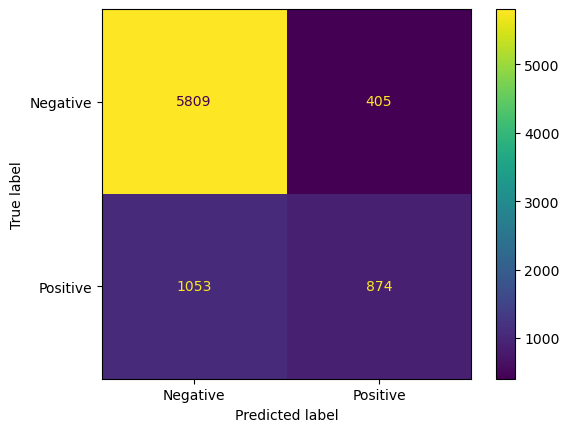

In [157]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Negative','Positive'])
disp.plot()

TN, FP, FN, TP = cm.ravel()
print(f'True Positive: {TP},\nTrue Negative: {TN},\nFalse Positive: {FP},\nFalse Negative: {FN}')

In [158]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)      
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")

Accuracy: 0.82
Precision: 0.68
Sensitivity: 0.45
F1 Score: 0.55
